Reference: https://github.com/enakai00/jupyter_tfbook

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

In [4]:
np.random.seed(20180804)
tf.set_random_seed(20180804)

df0 = generate_datablock(30, [-7,-7], 18, 1)
df1 = generate_datablock(30, [-7,7], 18, 0)
df2 = generate_datablock(30, [7,-7], 18, 0)
df3 = generate_datablock(30, [7,7], 18, 1)

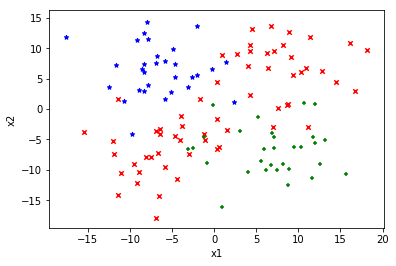

In [5]:
ax = df0.plot.scatter(x='x1',y='x2', marker='x', c='r')
df1.plot.scatter(x='x1',y='x2', marker='*', c='b', ax=ax)
df2.plot.scatter(x='x1',y='x2', marker='+', c='g', ax=ax)
df3.plot.scatter(x='x1',y='x2', marker='x', c='r', ax=ax)

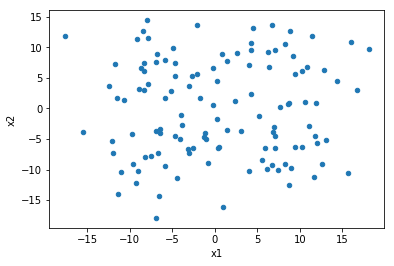

In [6]:
df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)
train_set.plot.scatter(x='x1', y='x2')

In [7]:
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [8]:
num_units1 = 2
num_units2 = 40

In [9]:
x = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units1]))
b1 = tf.Variable(tf.zeros([num_units1]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(x, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden2, w0) + b0)

In [10]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [12]:
i = 0
for _ in range(2000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run(
        [loss, accuracy], feed_dict={x:train_x, t:train_t})
        print('Step: {}, Loss: {}, Accuracy: {}'.format(i, loss_val, acc_val))

Step: 100, Loss: 80.4583740234375, Accuracy: 0.6166666746139526
Step: 200, Loss: 78.95919799804688, Accuracy: 0.6333333253860474
Step: 300, Loss: 77.41938781738281, Accuracy: 0.6416666507720947
Step: 400, Loss: 74.82073211669922, Accuracy: 0.6499999761581421
Step: 500, Loss: 70.42659759521484, Accuracy: 0.7166666388511658
Step: 600, Loss: 65.02533721923828, Accuracy: 0.75
Step: 700, Loss: 59.82587814331055, Accuracy: 0.7749999761581421
Step: 800, Loss: 55.02516555786133, Accuracy: 0.8166666626930237
Step: 900, Loss: 50.629112243652344, Accuracy: 0.8500000238418579
Step: 1000, Loss: 46.979713439941406, Accuracy: 0.8500000238418579
Step: 1100, Loss: 44.06284713745117, Accuracy: 0.8583333492279053
Step: 1200, Loss: 41.72850036621094, Accuracy: 0.8666666746139526
Step: 1300, Loss: 39.7200927734375, Accuracy: 0.8583333492279053
Step: 1400, Loss: 37.93940734863281, Accuracy: 0.8583333492279053
Step: 1500, Loss: 36.48344421386719, Accuracy: 0.8500000238418579
Step: 1600, Loss: 35.272556304931

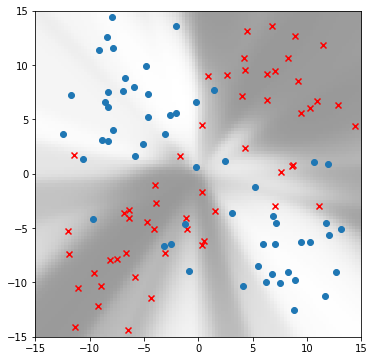

In [13]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x', c='r')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = []
for x2 in np.linspace(-15,15,100):
    for x1 in np.linspace(-15,15,100):
        locations.append((x1, x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(-15,15,-15,15), cmap=plt.cm.gray_r, alpha=0.4)